In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import pandas as pd

# Read the dataset
df = pd.read_csv("netflix_titles.csv")

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# function to extract numeric duration from 'duration' column
def extract_minutes(duration):
    if pd.isnull(duration):
        return np.nan
    if 'min' in duration:
        return int(re.search(r'\d+', duration).group())
    return np.nan

def extract_seasons(duration):
    if pd.isnull(duration):
        return np.nan
    if 'Season' in duration:
        return int(re.search(r'\d+', duration).group())
    return np.nan

df['duration_minutes'] = df['duration'].apply(extract_minutes)
df['num_seasons'] = df['duration'].apply(extract_seasons)

# Number of Titles by Type (Movies vs. TV Shows)

Netflix's catalog is heavily dominated by movies, which make up the majority of available content. This indicates a strategy focused on single-session viewership, perhaps due to lower production costs and quicker global release cycles compared to multi-episode series.

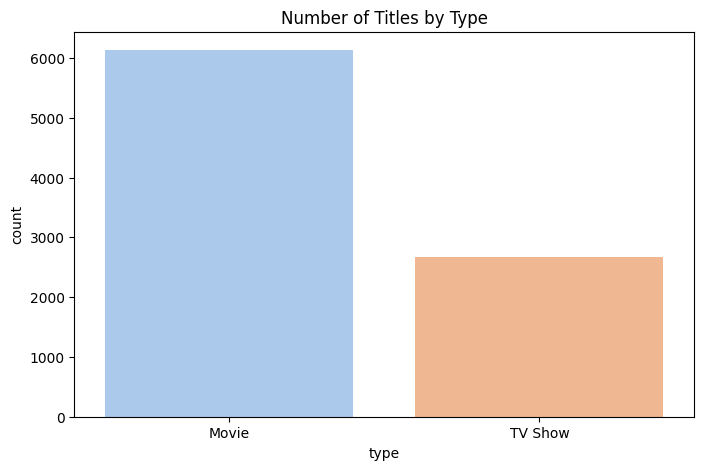

In [16]:
# 1. Titles by Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', hue='type', palette='pastel', legend=False)
plt.title('Number of Titles by Type')
plt.show()

# Titles Released by Year

There was a steady growth in content releases up to 2019, reflecting Netflix’s aggressive expansion and investment in original productions. A slight dip in 2020 likely resulted from COVID-19’s disruption of global film and TV production.

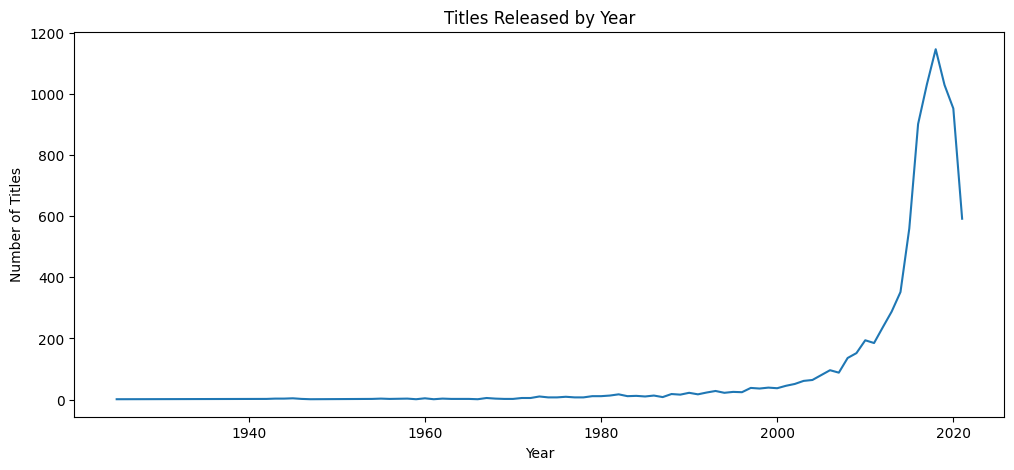

In [3]:
# 2. Titles Released Over Time
plt.figure(figsize=(12, 5))
df['release_year'].value_counts().sort_index().plot()
plt.title('Titles Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

# Top 10 Countries with the Most Titles

The United States is the leading content producer on Netflix, followed by India and the United Kingdom. These countries reflect Netflix’s focus on established film industries and high-demand markets. The presence of multiple countries also signals Netflix's global content diversification strategy.

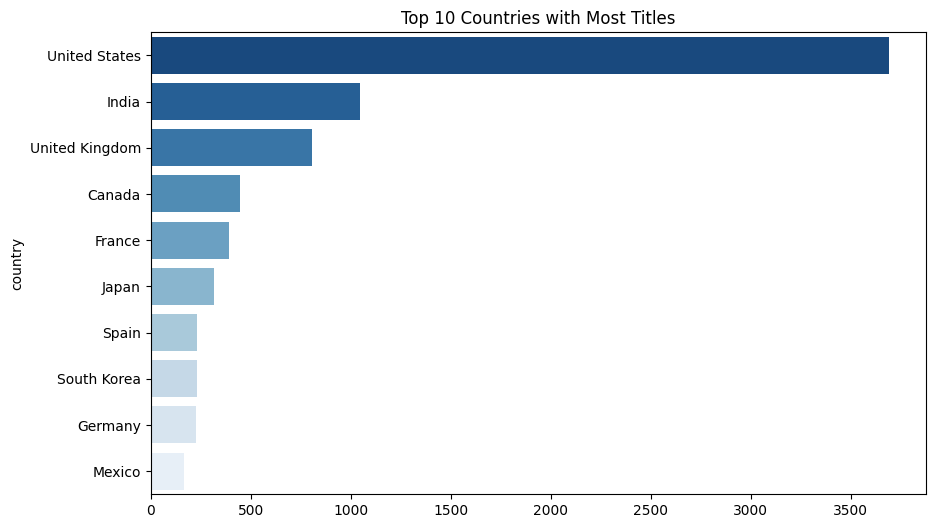

In [ ]:
# 3. Top 10 Countries
plt.figure(figsize=(10, 6))
top_countries = df['country'].dropna().str.split(', ').explode().value_counts().head(10)
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,       
    palette='Blues_r',
    legend=False                    
)
plt.title('Top 10 Countries with Most Titles')
plt.show()

# Rating Distribution

The most common content ratings are TV-MA and TV-14, showing that Netflix primarily targets mature audiences and teenagers. This suggests a content strategy focused on drama, thrillers, and adult storytelling themes, which tend to drive higher engagement.

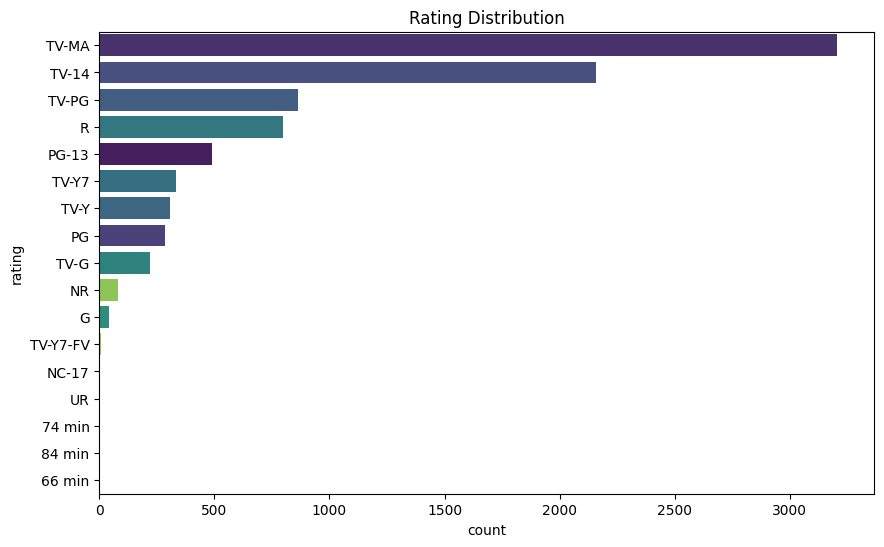

In [23]:
# 4. Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(
    y='rating',
    data=df,
    order=df['rating'].value_counts().index,
    hue='rating',
    palette='viridis',
    legend=False
)
plt.title('Rating Distribution')
plt.show()

# Movie Duration Distribution

Most movies fall between 80 and 120 minutes, aligning with standard feature film formats. A few outliers exceed 150 minutes or fall below 60, indicating the presence of extended features, documentaries, or short films, showcasing format flexibility on the platform.

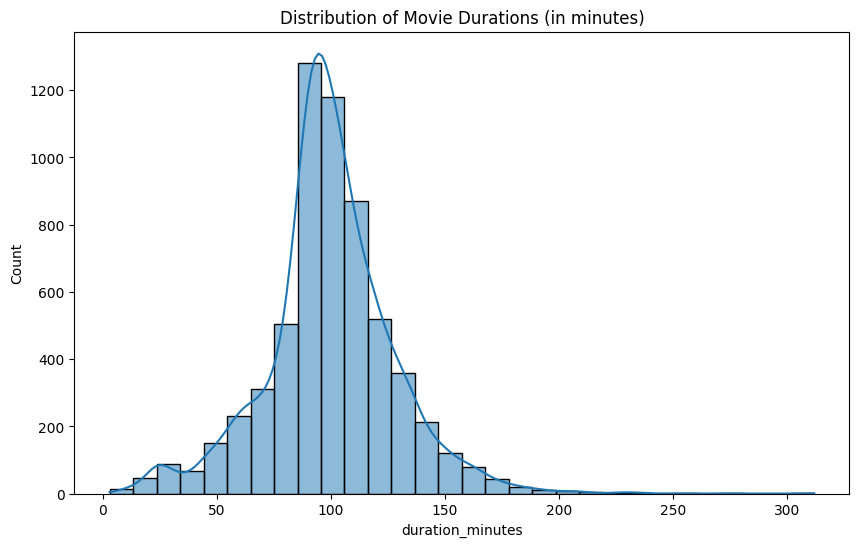

In [6]:
# 5. Movie Duration Distribution
plt.figure(figsize=(10, 6))
movie_durations = df[df['type'] == 'Movie']['duration_minutes'].dropna()
sns.histplot(movie_durations, bins=30, kde=True)
plt.title('Distribution of Movie Durations (in minutes)')
plt.show()

# Number of Seasons in TV Shows

A significant portion of TV shows have just 1 or 2 seasons, which reflects Netflix’s frequent use of limited series formats or quick cancellation of underperforming content. This also aligns with the company's tendency to test ideas rapidly with minimal long-term commitment.

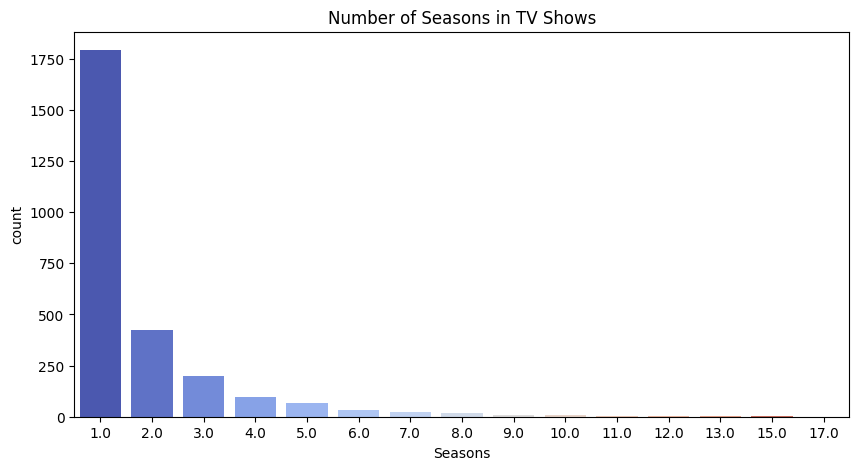

In [24]:
# 6. Number of Seasons in TV Shows
plt.figure(figsize=(10, 5))
tv_seasons = df[df['type'] == 'TV Show']['num_seasons'].dropna()
sns.countplot(
    x=tv_seasons,
    hue=tv_seasons,
    palette='coolwarm',
    legend=False
)
plt.title('Number of Seasons in TV Shows')
plt.xlabel('Seasons')
plt.show()

# Most Common Genres

Top genres include dramas, comedies, documentaries, and content for kids. This reflects Netflix’s attempt to offer a broad, balanced catalog appealing to families, young adults, and international viewers, supporting both bingeable and educational content.

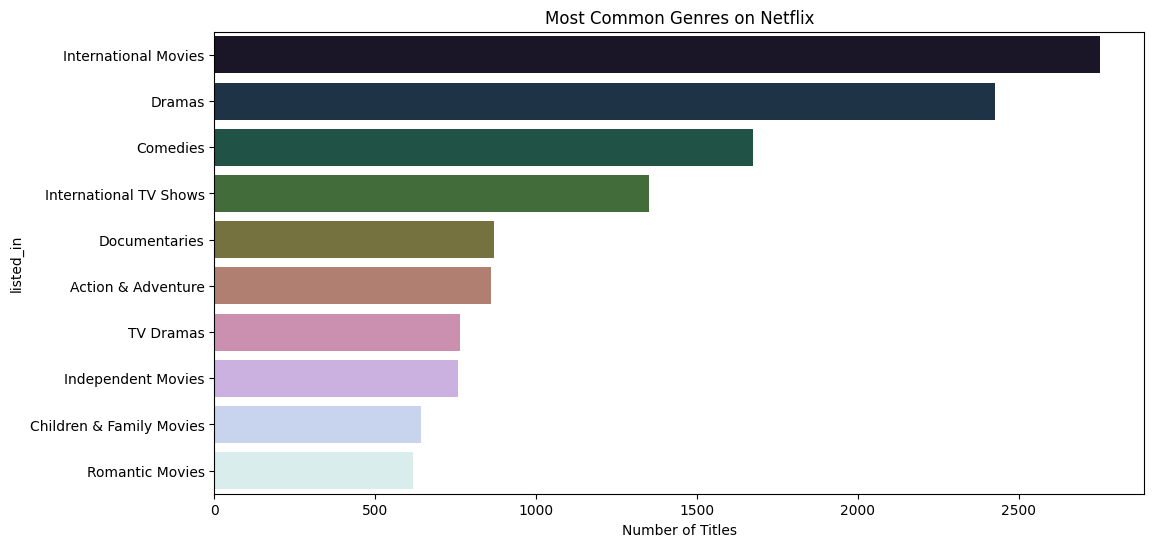

In [25]:
# 7. Most Common Genres
plt.figure(figsize=(12, 6))
genres = df['listed_in'].dropna().str.split(', ').explode().value_counts().head(10)
sns.barplot(
    y=genres.index,
    x=genres.values,
    hue=genres.index,
    palette='cubehelix',
    legend=False
)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.show()

# Top 10 Directors with the Most Titles

The most prolific directors on Netflix are not necessarily globally recognized. This suggests Netflix often works with independent filmmakers or those involved in low-budget or regional content, reflecting its investment in niche, diverse voices across different markets.

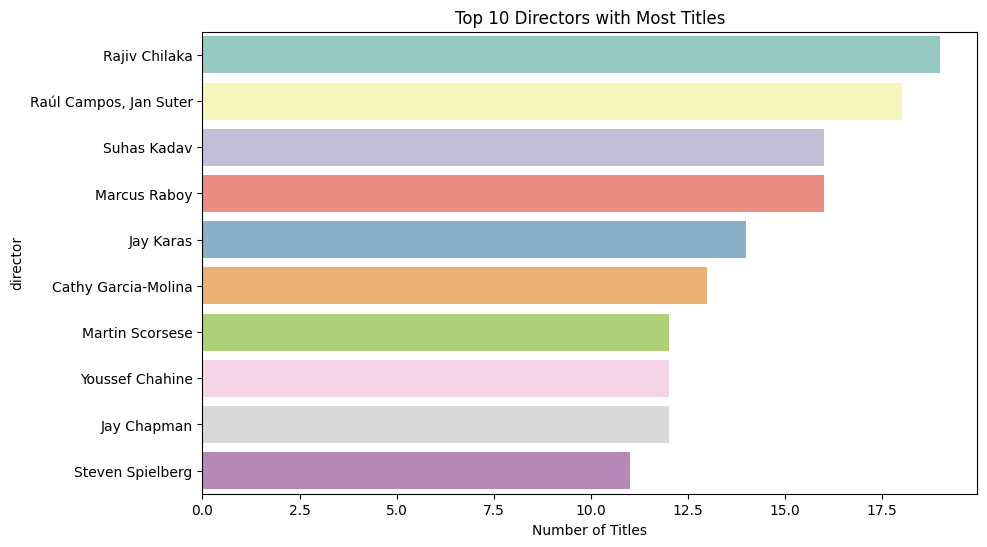

In [26]:
# 8. Top 10 Directors
plt.figure(figsize=(10, 6))
top_directors = df['director'].dropna().value_counts().head(10)
sns.barplot(
    y=top_directors.index,
    x=top_directors.values,
    hue=top_directors.index,
    palette='Set3',
    legend=False
)
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.show()

# Top 10 Most Frequent Actors/Actresses

Frequently featured actors tend to come from regions with a high volume of Netflix productions, such as India. This supports Netflix’s approach of leveraging local talent to appeal to domestic markets while also elevating regional actors to global audiences.

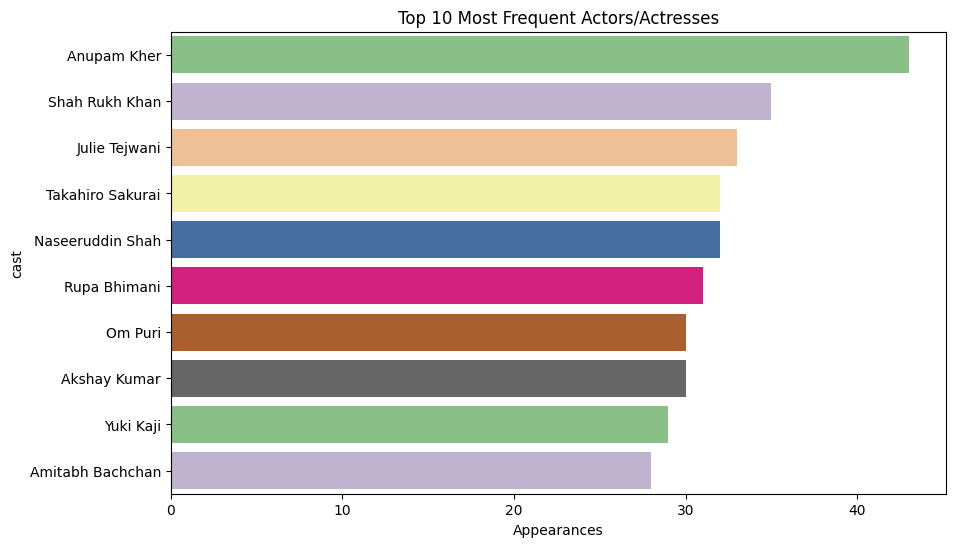

In [27]:
# 9. Top 10 Most Frequent Cast Members
plt.figure(figsize=(10, 6))
top_cast = df['cast'].dropna().str.split(', ').explode().value_counts().head(10)
sns.barplot(
    y=top_cast.index,
    x=top_cast.values,
    hue=top_cast.index,
    palette='Accent',
    legend=False
)
plt.title('Top 10 Most Frequent Actors/Actresses')
plt.xlabel('Appearances')
plt.show()

# Movies vs. TV Shows Over Time

While movies consistently outnumber series, there has been a notable rise in TV show production since 2015. This trend aligns with the growing popularity of binge-watching, encouraging Netflix to invest more in episodic content to boost user retention.

<Figure size 1200x600 with 0 Axes>

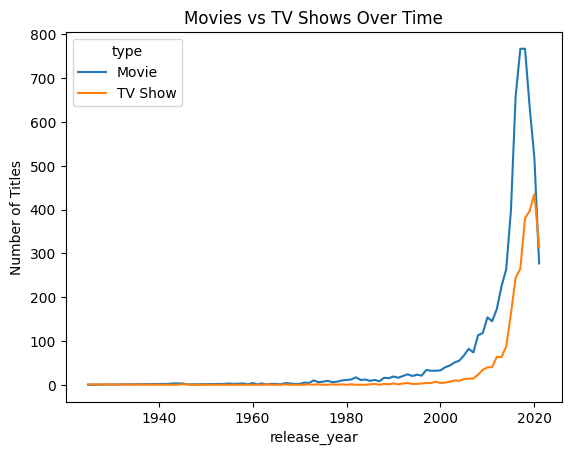

In [11]:
# 10. Movies vs TV Shows Over Time
plt.figure(figsize=(12, 6))
type_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
type_year.plot()
plt.title('Movies vs TV Shows Over Time')
plt.ylabel('Number of Titles')
plt.show()

# Boxplot of Movie Durations

The central duration range for most movies lies between 90 and 100 minutes, though there are several outliers on both the short and long ends. This confirms that while Netflix sticks to conventional film lengths, it also accommodates experimental and flexible runtimes.

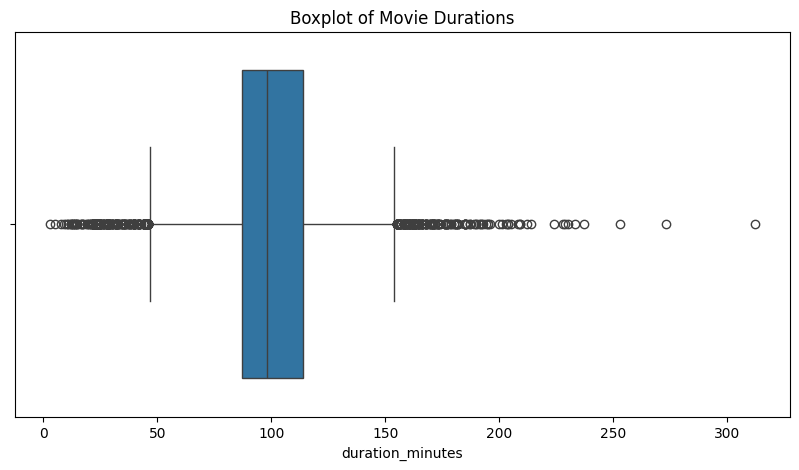

In [12]:
# 11. Boxplot of Movie Durations
plt.figure(figsize=(10, 5))
sns.boxplot(x=df[df['type'] == 'Movie']['duration_minutes'])
plt.title('Boxplot of Movie Durations')
plt.show()

# Heatmap: Titles by Country and Year

The United States remains the dominant producer across all years, but countries like India, Canada, and the UK have shown significant growth in recent years. This heatmap demonstrates Netflix’s efforts to expand regional production and localize content for diverse audiences.

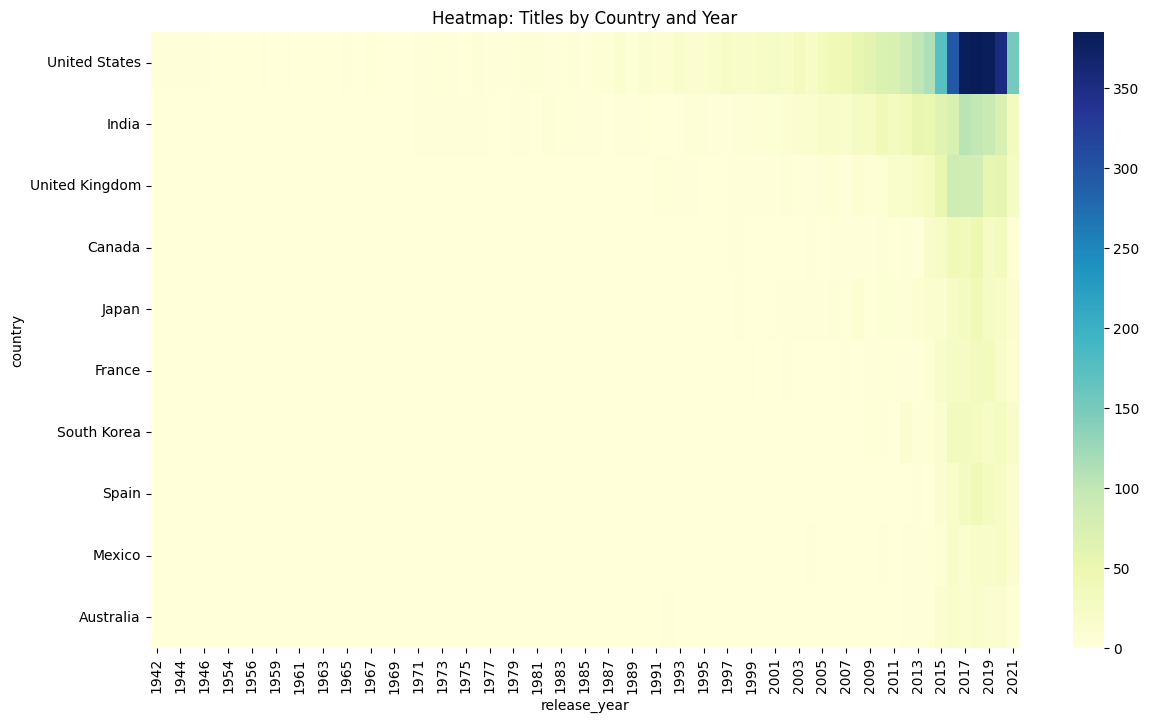

In [13]:
# 12. Heatmap: Titles by Country and Year
plt.figure(figsize=(14, 8))
country_year_df = df.dropna(subset=['country']).copy()
country_year_df['country'] = country_year_df['country'].str.split(', ').str[0]
heatmap_data = country_year_df.pivot_table(index='country', columns='release_year', aggfunc='size', fill_value=0)
top_countries_heatmap = heatmap_data.loc[heatmap_data.sum(axis=1).nlargest(10).index]
sns.heatmap(top_countries_heatmap, cmap="YlGnBu")
plt.title('Heatmap: Titles by Country and Year')
plt.show()